In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import random
import time


/home/matti/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
N=512
rho1 = np.ones((N,N,N),dtype=float);
a = np.sum(rho1)
print(a)

134217728.0


In [22]:
def f(n):
    c=0
    while(n >= 0):
        n = n - 2
        c = c + n - 2
    return c
    
for i in range(1,10):
    if i%2!=0:
        print(i,f(i-2)<f(i))

1 False
3 False
5 True
7 True
9 True


13293
5001
1.3235294117647061e-05


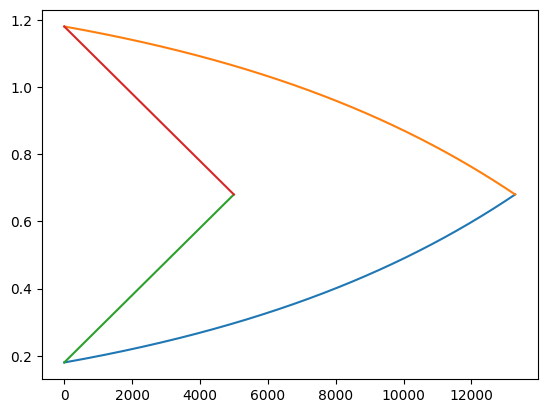

In [47]:
rho1 = 0.1
rho2 = 1.1
push_fac = 0.01
ratio_max = 0.5
rho_tot = rho1 + rho2;
rho1_0 = rho1
rho2_0 = rho2

def original(push_fac):
    rho1s = []
    rho2s = []
    f1 = rho1
    f2 = rho2
    ratio = rho1 / ( rho1 + rho2 ) 
    while (ratio < ratio_max):
        f2 = f2 * (1 - push_fac*f1/f2)
        f1 = f1 * (1 + push_fac)
        ratio = f1 / ( f1 + f2 ) 
        rho1s.append(f1)
        rho2s.append(f2)
    return (np.array(rho1s), np.array(rho2s))

def new(push_fac):
    rho1s = []
    rho2s = []
    f1 = rho1
    f2 = rho2
    ratio = rho1 / ( rho1 + rho2 ) 
    while (ratio < ratio_max):
        r = f1/f2
        f2 = f2 - push_fac
        f1 = f1 + push_fac
        ratio = f1 / ( f1 + f2 )
        rho1s.append(f1)
        rho2s.append(f2)
    return (np.array(rho1s), np.array(rho2s))

o1, o2 = original(push_fac)
n1, n2 = new(push_fac)
print(push_fac*rho1/rho_tot)
plt.plot(o1)
plt.plot(o2)
plt.plot(n1)
plt.plot(n2)